From scratch implementation of Adaboost classifier(using Decision trees) is shown below on the lending club dataset

Exploratory Data Analysis

In [27]:
#libraries
import adaboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score


In [3]:
#dataset
loan_data = pd.read_csv('lending-club-data.csv')

c:\users\dell i\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [4]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,grade_num,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,last_delinq_none,last_record_none,last_major_derog_none
count,1.226070e+05,1.226070e+05,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,1.226030e+05,122607.000000,122578.000000,...,122607.000000,122607.000000,122578.000000,122578.000000,122462.000000,122607.000000,122603.000000,122607.000000,122607.000000,122607.000000
mean,4.728452e+06,5.493222e+06,12809.733743,12736.123753,12497.828395,13.639487,396.623285,7.138502e+04,15.496888,0.211996,...,4.232882,0.597509,0.858107,0.908173,0.996734,0.123672,7.564725,0.588115,0.897795,0.873906
std,5.938517e+06,6.604693e+06,7932.313398,7887.167118,7946.731527,4.390836,239.475936,5.841483e+04,7.497442,0.662052,...,1.362138,0.278934,0.348942,0.288783,0.057059,0.329208,4.127291,0.492177,0.302918,0.331957
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.028895,0.000000,0.000000,0.000000
25%,8.532925e+05,1.064872e+06,6700.000000,6625.000000,6271.000000,10.620000,215.985000,4.405250e+04,9.880000,0.000000,...,3.000000,0.400000,1.000000,1.000000,1.000000,0.000000,4.362575,0.000000,1.000000,1.000000
50%,1.621401e+06,1.879659e+06,11000.000000,10950.000000,10500.000000,13.480000,348.180000,6.000000e+04,15.260000,0.000000,...,4.000000,0.600000,1.000000,1.000000,1.000000,0.000000,6.965760,1.000000,1.000000,1.000000
75%,6.699942e+06,8.117948e+06,17600.000000,17425.000000,17000.000000,16.290000,521.930000,8.500000e+04,20.850000,0.000000,...,5.000000,0.800000,1.000000,1.000000,1.000000,0.000000,10.215850,1.000000,1.000000,1.000000
max,3.784128e+07,4.060424e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.880000,29.000000,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.171000,1.000000,1.000000,1.000000


In [5]:
#Check for nan values
bool_array_nan = pd.isna(loan_data).all()
if(bool_array_nan.any()==True):
    print('No nan values present')
else:
    print('Nan values present \n')
    print('Column indexes:')
    idx,idy = np.where(pd.isna(loan_data))
    print(idy)

Nan values present 

Column indexes:
[10 28 29 ... 29 47 50]


In [6]:
#Features and targets
loan_data['safe_loans'] = loan_data['bad_loans'].apply(lambda x: 1 if x==0 else -1)
features = loan_data.drop(columns = ['bad_loans','safe_loans'],axis = 1)
targets = loan_data['safe_loans']

In [7]:
#selecting features
feature_columns = ['grade',              # grade of the loan
            'term',               # the term of the loan
            'home_ownership',     # home ownership status: own, mortgage or rent
            'emp_length',         # number of years of employment
           ]
features = features[feature_columns]
final_loan_data = loan_data[feature_columns + ['safe_loans']]


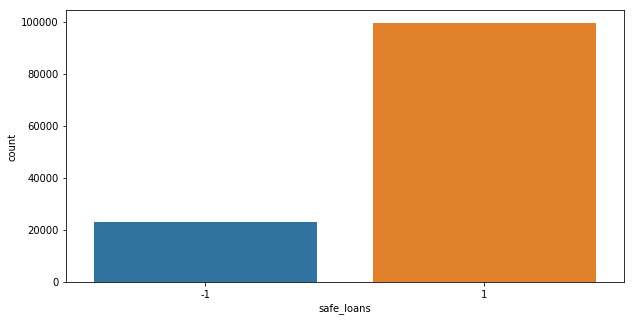

In [8]:
#Checking for class imbalance
plt.figure(figsize = (10,5))
sns.countplot(x = targets,data = features)
plt.show()

A case of class imbalance

In [9]:
#undersampling the majority class
safe_loans_raw = final_loan_data[final_loan_data['safe_loans'] == 1]
risky_loans_raw = final_loan_data[final_loan_data['safe_loans'] == -1]
# Undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(frac = percentage,random_state = 1)
final_sampled_loans_data = risky_loans_raw.append(safe_loans)
features = final_sampled_loans_data.drop(columns = ['safe_loans'],axis = 1)
targets = final_sampled_loans_data['safe_loans']

In [10]:
final_sampled_loans_data.head()

,grade,term,home_ownership,emp_length,safe_loans
1,C,60 months,RENT,< 1 year,-1
6,F,60 months,OWN,4 years,-1
7,B,60 months,RENT,< 1 year,-1
10,C,36 months,RENT,< 1 year,-1
12,B,36 months,RENT,3 years,-1


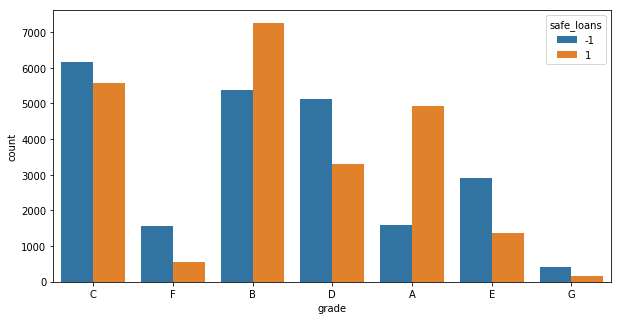

In [10]:
#Checking for variation of features with classes
plt.figure(figsize = (10,5))
sns.countplot(x = 'grade',hue = 'safe_loans',data = final_sampled_loans_data)
plt.show()

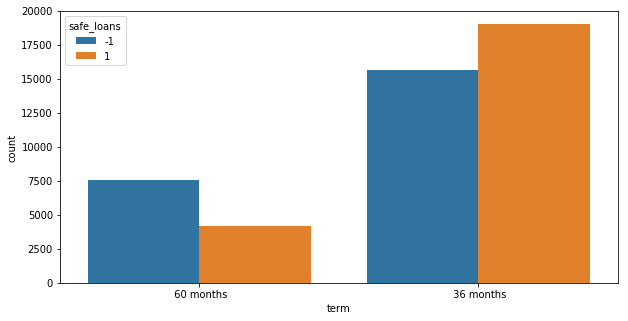

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'term',hue = 'safe_loans',data = final_sampled_loans_data)
plt.show()

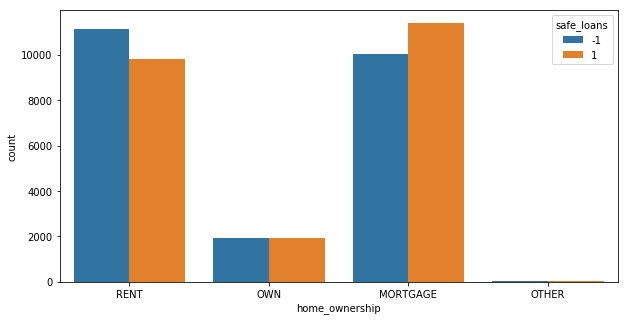

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'home_ownership',hue = 'safe_loans',data = final_sampled_loans_data)
plt.show()

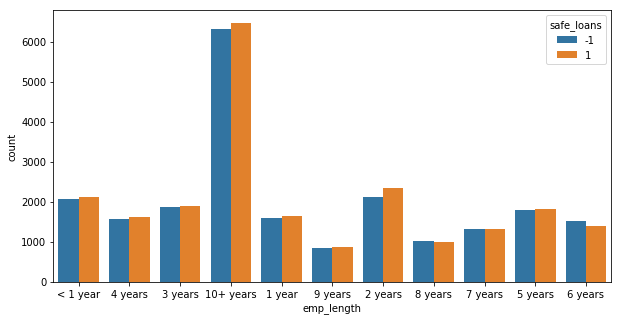

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'emp_length',hue = 'safe_loans',data = final_sampled_loans_data)
plt.show()

In [11]:
#Label encoding and one hot encoding categorical variables
features_ = pd.get_dummies(features)


In [12]:
#train test split(training and validation split)
features_train,features_test,target_train,target_test = train_test_split(features_,targets,test_size = 0.2,random_state = 1)
feature_names = features_.columns


In [30]:
#training adaboost with 10 classifiers and max tree depth will be 10
weights,classifiers = adaboost.adaboost_fit(features_,features_train,target_train,10,10)

In [31]:
#train and validation set predictions
y_train_pred = adaboost.predict(weights,classifiers,features_train)
y_valid_pred = adaboost.predict(weights,classifiers,features_test)

In [32]:
#train and test accuracy
print('Train accuracy:' + str(accuracy_score(target_train.values,y_train_pred)) + '\n')
print('Validation accuracy: ' + str(accuracy_score(target_test.values,y_valid_pred)) + '\n')

Train accuracy:0.6199784017278618

Validation accuracy: 0.6128509719222462

